The purpose of this experiment is to find out that, what is the difference between:  
1. Finding probality of an independent event as the ratio of the desired outcome and the total number of outcomes.  
2. Finding probability as the mean of individual probabilities as ratio of desired outcome and total number of outcomes.  

Here total number of outcomes for both the cases shall remain constant in order to induce fairness to the experiment.  
We will name the first approach as *normal*, and the second approach as *iterative*.  

To keep the total number of outcomes same in both the experiments. We will take number of outcomes (N_normal) for *normal* approach as 100000. And number of outcomes for each iteration of the second approach as 100000/100 = 1000, while keeping the number of iterations as 100.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# real theta (probability for getting a head)
theta = 0.35

In [13]:
N_iterative = 100

def iterative_approach(r: int, n_i: int, N:int, res=np.array([])):
    if r <= 0:
        return res
    p = np.array([])
    for _ in range(n_i):
        data = np.random.choice([0, 1], size=N, p=[1-theta, theta])
        cout_ones = np.count_nonzero(data == 1)

        p = np.append(p, [cout_ones/N])
    
    res = np.append(res, [p.mean()])
    return iterative_approach(r - 1, n_i, N, res)

iterative_result = iterative_approach(20, 1000, N_iterative)


In [14]:
N_normal = 100000

def large_number_approach(r: int, N: int, res=np.array([])):
    if r <= 0:
        return res
    data = np.random.choice([0, 1], size=N, p=[1-theta, theta])
    cout_ones = np.count_nonzero(data == 1)

    res = np.append(res, [cout_ones/N])
    return large_number_approach(r - 1, N, res)

normal_result = large_number_approach(20, N_normal)

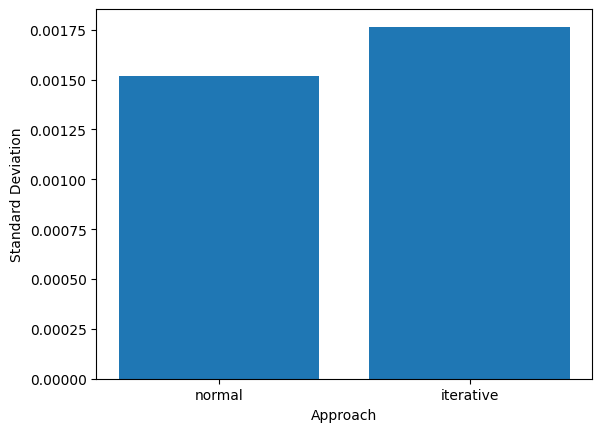

In [15]:
std_normal = np.std(normal_result, mean=[theta])
std_iterative = np.std(iterative_result, mean=[theta])

fig, ax = plt.subplots()

ax.bar(['normal', 'iterative'], [std_normal, std_iterative])
ax.set_xlabel('Approach')
ax.set_ylabel('Standard Deviation')

plt.show()

In the above figure we observe that, both the approaches have almost the same standard deviation. so both the cases shall produce similar probabilities if the number of outcomes shall remain equal for both.

Now the question to prefer which method.

It would be ideal to prefer the *normal* method for the following reasons:
1. It is faster (no iterations).
2. It is simple and straightforward.
3. No decrease in precision of the result.

Thre third point is explained as, if we take small chunks of outcomes in each iterations, like for example 10 outcomes, then it could decrease the precision of the overall result. Because 10 division of a unit is less precisse then for example 100 divisions of the unit.